Iris 데이터셋을 이용한 DBSCAN 클러스터링
1단계: 필요한 라이브러리 불러오기
DBSCAN 클러스터링을 구현하기 위해 필요한 라이브러리를 불러옵니다. Seaborn을 사용하여 데이터를 불러오고, Sklearn 라이브러리에서 DBSCAN 알고리즘을 사용합니다

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import pandas as pd

# Iris 데이터셋 로드
df = sns.load_dataset('iris')
print(df.head())  # 데이터 확인


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


2단계: 특성 데이터 추출
Iris 데이터셋에서 클러스터링에 사용할 특성만 추출합니다. 이번 교안에서는 sepal_length, sepal_width, petal_length, petal_width 특성만 사용합니다.

In [8]:
# 특성 데이터 추출 (꽃 종류 제외)
X = df.iloc[:, :-1]  # 마지막 열인 'species' 제외
print(X.head())  # 특성 데이터 확인


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


3단계: DBSCAN 클러스터링 적용
eps와 min_samples 파라미터를 설정하여 DBSCAN 클러스터링을 적용합니다.

eps: 두 포인트가 같은 클러스터에 속할 수 있는 최대 거리.
min_samples: 한 클러스터 내에서 최소한으로 필요한 포인트의 개수.

In [9]:
# DBSCAN 모델 정의
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 클러스터 할당
df['cluster'] = dbscan.fit_predict(X)

# 클러스터링 결과 확인
print(df[['cluster']].value_counts())  # 클러스터링 결과 확인


cluster
 1         84
 0         49
-1         17
Name: count, dtype: int64


4단계: 차원 축소 (PCA)로 2D 변환
4차원 특성 데이터를 2차원으로 변환하여 시각화합니다. 이를 통해 클러스터의 분포를 더 명확하게 시각화할 수 있습니다.

In [10]:
# 차원 축소 (PCA) 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 변환된 데이터 확인
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']
print(df_pca.head())  # 2D로 축소된 데이터 확인

        PC1       PC2  cluster
0 -2.684126  0.319397        0
1 -2.714142 -0.177001        0
2 -2.888991 -0.144949        0
3 -2.745343 -0.318299        0
4 -2.728717  0.326755        0


5단계: 원본 라벨을 위한 컬러맵 설정
DBSCAN의 클러스터 결과를 시각화하고, 실제 붓꽃의 원본 라벨과 비교할 수 있도록 컬러맵을 설정합니다.

In [11]:
# 붓꽃 종류를 숫자로 매핑
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_code'] = df['species'].map(species_map)
print(df[['species', 'species_code']].head())  # 매핑 결과 확인


  species  species_code
0  setosa             0
1  setosa             0
2  setosa             0
3  setosa             0
4  setosa             0


6단계: DBSCAN 결과 시각화
PCA로 축소된 데이터를 이용해 DBSCAN 클러스터링 결과와 실제 붓꽃 종류를 시각화하여 비교합니다.

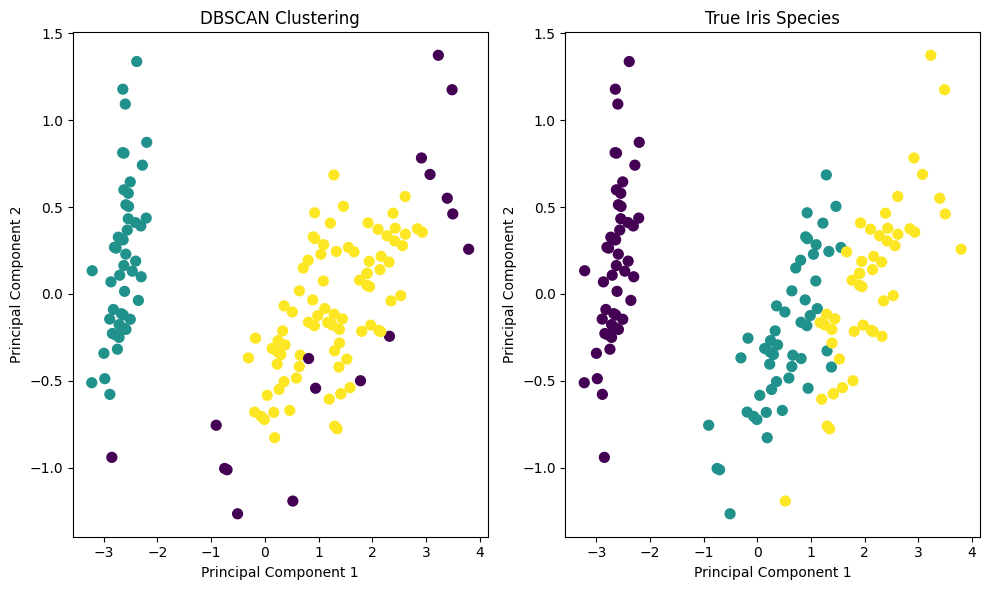

In [12]:
# 시각화
plt.figure(figsize=(10, 6))

# DBSCAN 클러스터링 결과
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 실제 붓꽃 종류별 시각화
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['species_code'], cmap='viridis', s=50)
plt.title('True Iris Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 그래프 표시
plt.tight_layout()
plt.show()
